# INFO7390 Assignment2

## clustering

* Do the clustering methods generate the same clusters?
* Does scaling effect the clustering?  
* Does the clustering produce interesting groupings?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import scipy
from sklearn import preprocessing, cluster
%matplotlib inline

In [2]:
df = pd.read_csv("WeatherHistoryData.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,year,month
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,01/04/2006 0:00,2006,4
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,01/04/2006 1:00,2006,4
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,01/04/2006 2:00,2006,4
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,01/04/2006 3:00,2006,4
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,01/04/2006 4:00,2006,4


In [3]:
def cloud_categorizer(row):
    row = str(row).lower()
    if "foggy" in row:
        return 5
    elif "overcast" in row:
        return 4
    elif "mostly cloudy" in row:
        return 3
    elif "partly cloudy" in row:
        return 2
    elif "clear" in row:
        return 1
    else:
        return 0
    return "" 

df["Cloud (summary)"] = df.apply (lambda row:cloud_categorizer(row["Summary"]) , axis = 1)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,year,month,Cloud (summary)
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,01/04/2006 0:00,2006,4,2
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,01/04/2006 1:00,2006,4,2
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,01/04/2006 2:00,2006,4,3
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,01/04/2006 3:00,2006,4,2
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,01/04/2006 4:00,2006,4,3


In [4]:
D = df.iloc[:,[3,5,6,7,8,9,14]]
D.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Cloud (summary)
0,9.472222,0.89,14.1197,251,15.8263,1015.13,2
1,9.355556,0.86,14.2646,259,15.8263,1015.63,2
2,9.377778,0.89,3.9284,204,14.9569,1015.94,3
3,8.288889,0.83,14.1036,269,15.8263,1016.41,2
4,8.755556,0.83,11.0446,259,15.8263,1016.51,3


### Normalize the data
#### Normalize dataset for easier parameter selection.
#### Standardize features by removing the mean and scaling to unit variance

In [5]:
scaler = preprocessing.scale(D)
scaler_df = pd.DataFrame(scaler)
scaler_df.columns = D.columns
scaler_df.index = D.index
scaler_df.head()                         

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Cloud (summary)
0,-0.257599,0.793470,0.478635,0.591256,1.306976,-0.217345,-0.686796
1,-0.269814,0.639996,0.499594,0.665756,1.306976,-0.152631,-0.686796
2,-0.267487,0.793470,-0.995473,0.153570,1.099586,-0.112509,0.216887
3,-0.381489,0.486521,0.476306,0.758881,1.306976,-0.051678,-0.686796
4,-0.332631,0.486521,0.033841,0.665756,1.306976,-0.038735,0.216887


### Clustering Algorithms

#### KMeans Algorithm:

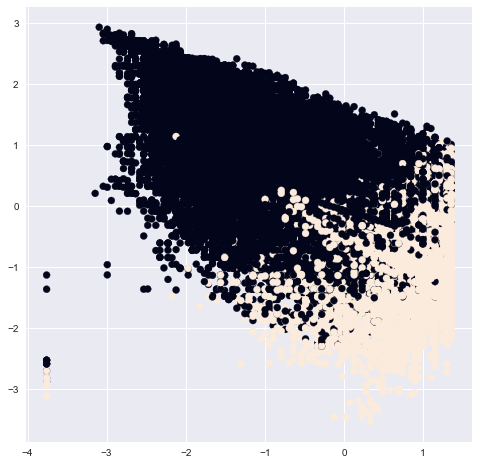

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8
km = cluster.KMeans(n_clusters = 2)
pred_km = km.fit_predict(scaler_df)
plt.scatter(scaler_df.iloc[:,1], scaler_df.iloc[:,0], c= pred_km)
plt.show()

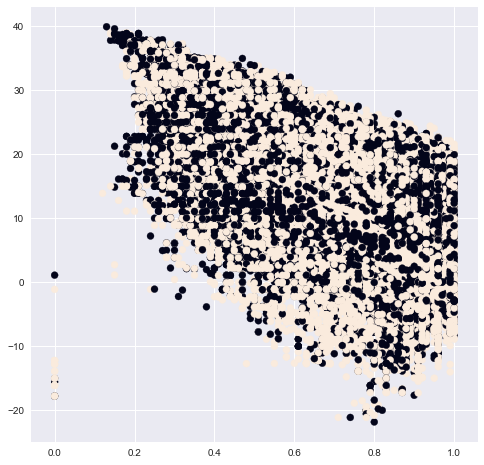

In [7]:
pred_km_D = km.fit_predict(D)
plt.scatter(D.iloc[:,1], D.iloc[:,0], c= pred_km_D)
plt.show()

#### DBScan Algorithm:

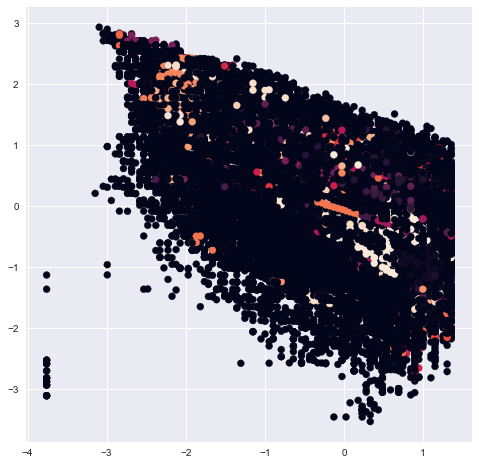

In [8]:
db = cluster.DBSCAN(eps=0.3)
pred_db = db.fit_predict(scaler_df)
plt.scatter(scaler_df.iloc[:,1], scaler_df.iloc[:,0], c= pred_db)
plt.show()

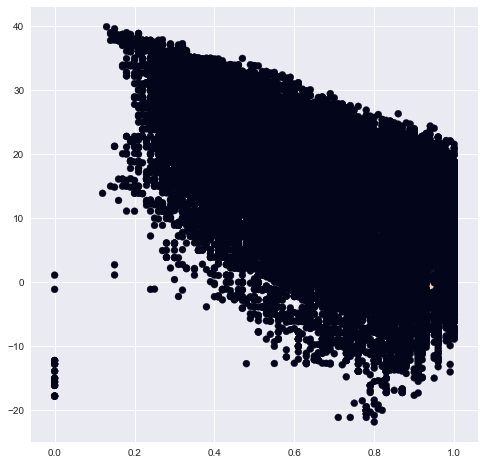

In [9]:
pred_db_D = db.fit_predict(D)
plt.scatter(D.iloc[:,1], D.iloc[:,0], c= pred_db_D)
plt.show()

#### Meanshift Algorithm

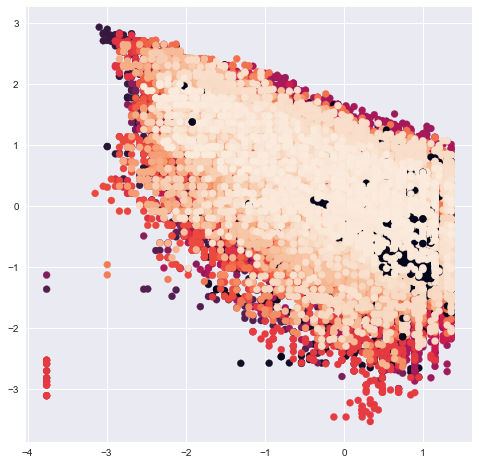

In [10]:
ms = cluster.MeanShift(bandwidth = 0.1)
pred_ms = ms.fit_predict(scaler_df)
plt.scatter(scaler_df.iloc[:,1], scaler_df.iloc[:,0], c= pred_ms)
plt.show()

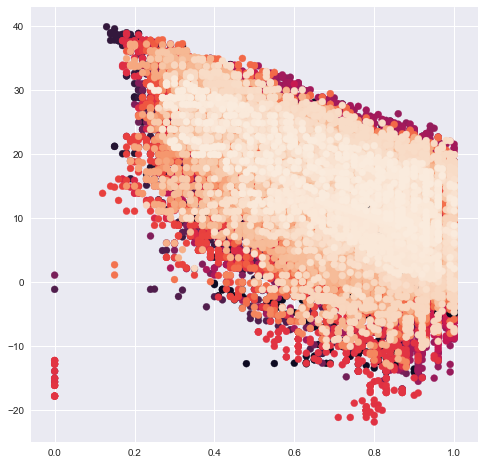

In [11]:
pred_ms_D = ms.fit_predict(D)
plt.scatter(D.iloc[:,1], D.iloc[:,0], c= pred_ms_D)
plt.show()

#### KMeans, DBScan and Meanshift algorithms plots different clusters. The distribution of the data of weather's temperature and humidity  has no obvious cluster features.
#### In this data set, as to KMeans, scaling has effection on the clustering, however sacling has little effection on the clustering concerning DBScan and Meanshift algorithms.

## Linear Regression

* Is the relationship significant?   
* Are any model assumptions violated?   
* Is there any multi-colinearity in the model?   
* In the multiple regression models are predictor variables independent of all the other predictor variables?   
* In in multiple regression models rank the most significant predictor variables and exclude insignificant ones from the model.   
* Does the model make sense?  
* Cross-validate the model. How well did it do?      
* Does regularization help with creating models that validate better on out of sample data? 

In [38]:
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.formula.api import ols, rlm
import statsmodels.api as sm
from scipy import stats
from statsmodels.regression.linear_model import OLS

In [13]:
df_1 = scaler_df.drop(['Cloud (summary)'],axis=1)

In [14]:
x = np.array(df_1.iloc[:,1:])

In [15]:
X = sm.add_constant(x)

In [16]:
y = np.array(df_1['Temperature (C)'])

In [17]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                 2.280e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        23:26:08   Log-Likelihood:                -99236.
No. Observations:               96453   AIC:                         1.985e+05
Df Residuals:                   96447   BIC:                         1.985e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.579e-16      0.002  -7.24e-14      1.000      -0.004       0.004
x1            -0.6218      0.002   -258.626      0.000      -0.626      -0.617
x2            -0.2264      0.002    -97.564      0.000      -0.231      -0.222
x3             0.0228      0.002     10.387      0.000       0.019       0.027
x4             0.1328      0.002     55.820      0.000       0.128       0.137
x5            -0.3171      0.002   -138.765      0.000      -0.322      -0.313
==============================================================================
Omnibus:                     3326.118   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3744.534
Skew:                          -0.449   Prob(JB):                         0.00
Kurtosis:                       3.354   Cond. No.                         1.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print('Parameters: ', results.params)
print('R2 = ', results.rsquared)

Parameters:  [ -1.57859836e-16  -6.21783552e-01  -2.26385518e-01   2.28253015e-02
   1.32826668e-01  -3.17113109e-01]
R2 =  0.541671636314


 #### Consider the hypothese:  

 H0: $\beta_1 = 0$  <br>
 H1: $\beta_1 \neq 0$ <br>
 $\alpha$ = 0.05

#### According to the data, F-statistic is large and the relationship are significant and all of the predictor variables' P <= α, we will reject H0, and also every predictor variables is significant.

#### Linear Regression Assumptions<br>
Ordinary least squares regression relies on several assumptions, including that the residuals are normally distributed and homoscedastic, the errors are independent and the relationships are linear.<br>
Investigate these assumptions visually by plotting my model.
#### Following are regression diagnostic plots by R:

![desc](plot.png)

#### 1.According the Residuals vs Fitted plot, there is an independency between the residuals and the fitted values;<br>
#### 2.In QQ plot, the residuls are normal, because they are in a line which almost is y = x;<br>
#### 3.In the third plot, there are more than 90% standardized residuals in [-2,2], so the standardized residuals are nearly normal distribution.

#### But as can we see above, the constant in the linear regression model is very significant, so we need to use more accurate assumption test to see the result using R:

    Call:
    lm(formula = df$Temperature..C. ~ df$Humidity + df$Wind.Speed..km.h. + 
        df$Visibility..km. + df$Pressure..millibars.)

    Coefficients:
                (Intercept)              df$Humidity     df$Wind.Speed..km.h.  
                 -3.075e-11               -6.208e-01               -2.242e-01  
         df$Visibility..km.  df$Pressure..millibars.  
                  1.339e-01               -3.182e-01  


    ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
    USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
    Level of Significance =  0.05 

    Call:
     gvlma(x = mod) 

                         Value  p-value                   Decision
    Global Stat        4235.30 0.000000 Assumptions NOT satisfied!
    Skewness           3235.89 0.000000 Assumptions NOT satisfied!
    Kurtosis            496.79 0.000000 Assumptions NOT satisfied!
    Link Function       492.04 0.000000 Assumptions NOT satisfied!
    Heteroscedasticity   10.59 0.001139 Assumptions NOT satisfied!

#### According to the result of above assumption tests, no assumption is satisfied.

#### In order to see the relationship between the predictors, I calculcate the correlation for each predictor variables and plot the heatmap:

In [19]:
correlations = df_1[['Humidity','Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)','Pressure (millibars)']].corr()
print(correlations)

                        Humidity  Wind Speed (km/h)  Wind Bearing (degrees)  \
Humidity                1.000000          -0.224951                0.000735   
Wind Speed (km/h)      -0.224951           1.000000                0.103822   
Wind Bearing (degrees)  0.000735           0.103822                1.000000   
Visibility (km)        -0.369173           0.100749                0.047594   
Pressure (millibars)    0.039032          -0.251391               -0.078211   

                        Visibility (km)  Pressure (millibars)  
Humidity                      -0.369173              0.039032  
Wind Speed (km/h)              0.100749             -0.251391  
Wind Bearing (degrees)         0.047594             -0.078211  
Visibility (km)                1.000000             -0.164598  
Pressure (millibars)          -0.164598              1.000000  


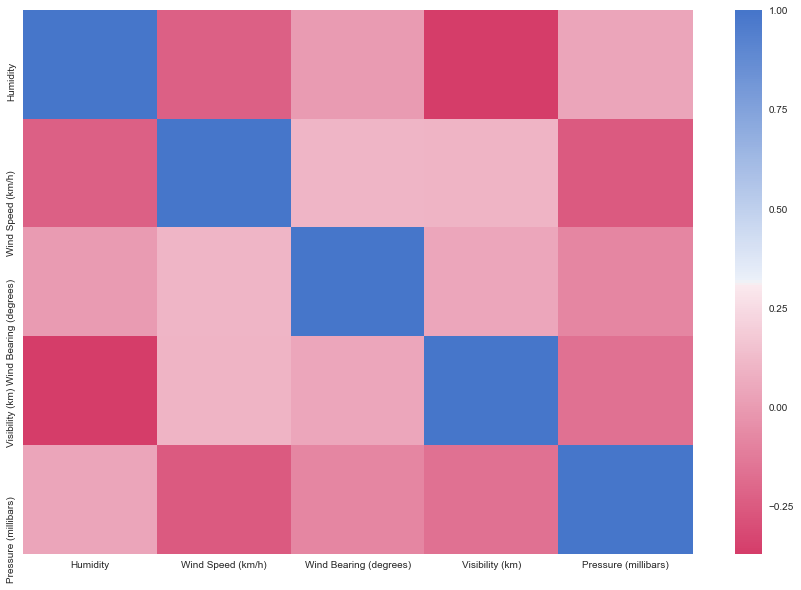

In [20]:
plt.rcParams['figure.figsize'] = (15, 10)
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
sns.heatmap(correlations, cmap=cmap)

#### Base on this heatmap, the predictors are independent with each other, and there is no multi-colinearity.

#### And then, According to the coefficient of each predictor variable which means to what extend it can have an influence on Interpreted variable, We can see the rank of predictors are X1, X5, X2, X4, X3. And coefficient of X3 Wind Bearing (degrees) is 0.0228, but the p of this predictor is smaller than $\alpha$, so this predictor is significant. But we can try to exclude this predictor to see if there any improve of R2.
                coef
        x1	-0.6218
        x2	-0.2264
        x3	 0.0228	
        x4	 0.1328	
        x5	-0.3171	



In [21]:
df_2 = df_1.drop(['Wind Bearing (degrees)'], axis=1)
x1 = np.array(df_2.iloc[:,1:])
X1 = sm.add_constant(x1)
y1 = np.array(df_2['Temperature (C)'])
model1 = sm.OLS(y1, X1)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                 2.844e+04
Date:                Fri, 16 Feb 2018   Prob (F-statistic):               0.00
Time:                        23:26:08   Log-Likelihood:                -99290.
No. Observations:               96453   AIC:                         1.986e+05
Df Residuals:                   96448   BIC:                         1.986e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.579e-16      0.002  -7.24e-14      1.000      -0.004       0.004
x1            -0.6208      0.002   -258.275      0.000      -0.626      -0.616
x2            -0.2242      0.002    -96.967      0.000      -0.229      -0.220
x3             0.1339      0.002     56.270      0.000       0.129       0.139
x4            -0.3182      0.002   -139.318      0.000      -0.323      -0.314
==============================================================================
Omnibus:                     3317.479   Durbin-Watson:                   0.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3732.679
Skew:                          -0.449   Prob(JB):                         0.00
Kurtosis:                       3.352   Cond. No.                         1.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### So there are no insignificant predictor variable in this model.

#### To 54% extend, This model can predict the city's temperature and make sense, the constant has a little more influence on the temperature.

### Cross-validation:

In [39]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
model2 = linear_model.LinearRegression()
predicted = cross_val_predict(model2, x, y, cv=10)
print(predicted)

[-0.35550901 -0.28272287 -0.09396829 ...,  0.8053121   0.61221914
  0.71165234]


In [23]:
predictors = ['Humidity', 'Wind Speed (km/h)','Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
scores = []
for train, test in KFold(len(df_1[predictors]), n_folds=10):
    model = sm.OLS(df_1['Temperature (C)'].iloc[train], df_1[predictors].iloc[train]).fit()
    y_pred = model.predict(df_1[predictors].iloc[test])
    y_true = df_1['Temperature (C)'].iloc[test]
    score = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    scores.append(score)
scores

[0.70708214852412188,
 0.5550711740326848,
 0.69928997966384232,
 0.74072674465846122,
 0.70327974336041754,
 0.77437531955764294,
 0.65994188305584112,
 0.59598196273362913,
 0.68506664037679366,
 0.64784159405474173]

In [24]:
np.mean(scores)

0.67686571900181769

#### The mean socre of this linear regression model is 0.67, which means to some extend, this model can predict the city‘s temperature using other data.

### Regularization

In [25]:
df_1.columns

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [26]:
X = sm.add_constant(df_1[predictors])
temp_mean = np.mean(df_1['Temperature (C)'])
model = OLS(df_1['Temperature (C)'], X)

In [27]:
ols_fit = model.fit()
ols_fittedvalues = ols_fit.predict(X)
rmse_ols = np.sqrt(metrics.mean_squared_error(df_1['Temperature (C)'], ols_fittedvalues))
print(rmse_ols)
print(temp_mean)
print(rmse_ols / temp_mean)

0.676999530048
-1.4689940473464976e-16
-4.60859273917e+15


In [28]:
lasso_fit = model.fit_regularized(L1_wt=1, alpha=0.05)
lasso_fittedvalues = lasso_fit.predict(X)
rmse_lasso = np.sqrt(metrics.mean_squared_error(df_1['Temperature (C)'], lasso_fittedvalues))
print(rmse_lasso)
print(temp_mean)
print(rmse_lasso / temp_mean)

0.685742022816
-1.4689940473464976e-16
-4.66810620543e+15


In [29]:
ridge_fit = model.fit_regularized(L1_wt=0, alpha=0.05)
ridge_fittedvalues = ridge_fit.predict(X)
rmse_ridge = np.sqrt(metrics.mean_squared_error(df_1['Temperature (C)'], ridge_fittedvalues))
print(rmse_ridge)
print(temp_mean)
print(rmse_ridge / temp_mean)

0.678142769338
-1.4689940473464976e-16
-4.6163752029e+15


#### According to these RMSE, The RMSE of regularization with Lasso and Ridgeare are similar as ols model.So regularization does not help to create model better in this linear regression.

## Logistic Regression

* Is the relationship significant?  
* Are any model assumptions violated?   
* Cross-validate the model. How well did it do?

#### I will predict the city will rain or not using other variables.

In [30]:
def rain_categorizer(row):
    row = str(row)
    if "rain" in row:
        return 1
    else:
        return 0

df["Rain"] = df.apply (lambda row:rain_categorizer(row["Precip Type"]) , axis = 1)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Date,year,month,Cloud (summary),Rain
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13,Partly cloudy throughout the day.,01/04/2006 0:00,2006,4,2,1
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63,Partly cloudy throughout the day.,01/04/2006 1:00,2006,4,2,1
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94,Partly cloudy throughout the day.,01/04/2006 2:00,2006,4,3,1
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41,Partly cloudy throughout the day.,01/04/2006 3:00,2006,4,2,1
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51,Partly cloudy throughout the day.,01/04/2006 4:00,2006,4,3,1


In [31]:
predictors = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)']
df_X = sm.add_constant(df[predictors])
model = sm.Logit(df['Rain'], df_X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.096581
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Rain   No. Observations:                96453
Model:                          Logit   Df Residuals:                    96446
Method:                           MLE   Df Model:                            6
Date:                Fri, 16 Feb 2018   Pseudo R-squ.:                  0.7315
Time:                        23:26:11   Log-Likelihood:                -9315.5
converged:                       True   LL-Null:                       -34697.
                                        LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.7027      2.378      1.557      0.120      -0.959       8.364
Temperature (C)            0.8315      0.010     86.814      0.000       0.813       0.850
Humidity                   2.6472      0.215     12.296      0.000       2.225       3.069
Wind Speed (km/h)          0.0028      0.003      0.884      0.376      -0.003       0.009
Wind Bearing (degrees)     0.0001      0.000      0.786      0.432      -0.000       0.000
Visibility (km)            0.0692      0.005     13.562      0.000       0.059       0.079
Pressure (millibars)      -0.0064      0.002     -2.847      0.004      -0.011      -0.002
==========================================================================================

Possibly complete quasi-separation: A fraction 0.53 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

####  Assume $\alpha$ = 0.05，if p < $\alpha$, the predictor variable is significant. So Wind Speed (km/h),Wind Bearing (degrees) are insignificant and others are significant.

#### And the coefficients of Wind Speed (km/h) and Wind Bearing (degrees) are very small, so I will exclude these two predictor variables.

In [32]:
predictors = ['Temperature (C)', 'Humidity', 'Visibility (km)', 'Pressure (millibars)']
df_X = sm.add_constant(df[predictors])
model = sm.Logit(df['Rain'], df_X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.096588
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Rain   No. Observations:                96453
Model:                          Logit   Df Residuals:                    96448
Method:                           MLE   Df Model:                            4
Date:                Fri, 16 Feb 2018   Pseudo R-squ.:                  0.7315
Time:                        23:26:11   Log-Likelihood:                -9316.2
converged:                       True   LL-Null:                       -34697.
                                        LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    4.6419      2.182      2.127      0.033       0.364       8.919
Temperature (C)          0.8314      0.010     86.829      0.000       0.813       0.850
Humidity                 2.6008      0.207     12.548      0.000       2.195       3.007
Visibility (km)          0.0697      0.005     13.714      0.000       0.060       0.080
Pressure (millibars)    -0.0073      0.002     -3.463      0.001      -0.011      -0.003
========================================================================================

Possibly complete quasi-separation: A fraction 0.53 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### In this way, all the predictor variables are significant now.

In [33]:
#odds ratio
np.exp(model.params)

const                   103.738568
Temperature (C)           2.296591
Humidity                 13.474863
Visibility (km)           1.072178
Pressure (millibars)      0.992754
dtype: float64

odds ratio tells us how a 1 unit increase or decrease in a variable affects the odds of being admitted.

In [34]:
conf = model.conf_int()
conf['OddsRatio'] = model.params
conf.columns = ['2.5%', '97.5%', 'OddsRatio']
np.exp(conf)

,2.5%,97.5%,OddsRatio
const,1.439503,7475.977379,103.738568
Temperature (C),2.253891,2.340099,2.296591
Humidity,8.976247,20.228046,13.474863
Visibility (km),1.061552,1.082911,1.072178
Pressure (millibars),0.988677,0.996848,0.992754


#### Draw dignostic plots using R:
![logitplot](plot_logit.png)

#### According to the plots, Residual does not distribute well and points in Normal QQ plot are not in a line. So the assumptions will be violated.

### Cross-validation

In [35]:
rmse = np.sqrt(metrics.mean_squared_error(df['Rain'], model.predict(df_X)))
rmse

0.13504159985802516

In [36]:
scores = []
for train, test in KFold(len(df[predictors]), n_folds=10):
    model = sm.Logit(df['Rain'].iloc[train], df[predictors].iloc[train]).fit()
    y_pred = model.predict(df[predictors].iloc[test])
    y_true = df['Rain'].iloc[test]
    score = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
    scores.append(score)
scores

Optimization terminated successfully.
         Current function value: 0.100770
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.102823
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.101252
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.100847
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.101004
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.091518
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.090133
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.103980
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.100956
         Iterations 11
Optimization terminated successfully.
         Current function value: 0.

[0.12341755169541772,
 0.099256865226727539,
 0.11898225744923296,
 0.12521177475493195,
 0.12294555335180077,
 0.15119274662390228,
 0.14837278702441942,
 0.085090526051231796,
 0.12245918375236627,
 0.21530525258965627]

In [37]:
np.mean(scores)

0.13122344985196871

#### According to the score of cross validation, this logistic regression model maybe not predict rain well.